# Introduction

This is a tutorial cum learning notes for PyTorch, covering the PyTorch Basics and gently getting into the details of Deep Learning using PyTorch


Let's start by reviewing very basic concepts of PyTorch

In [38]:
from re import I
import time, os, math
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.colors import to_rgba
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # for export

import seaborn as sns
sns.set()

from tqdm.notebook import tqdm

<ipython-input-38-b03bcc4d2c02>:10: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # for export


In [3]:
import torch
print(f"This environment is using Torch: {torch.__version__}")

This environment is using Torch: 2.1.0+cu118


Let's now establish the seed for the random number generation so that the experiments and code results are reproducible

In [4]:
torch.manual_seed(65) # Setting the seed

## Tensors
Tensors are the n-dimensional data structure provided by PyTorch environment and is the core data structure used in deep learning algorithms. It is equivalent to NumPy arrays, with the addition functionality to have support for GPU Acceleration. Since Numpy and Tensor are equivalent we can convert seamlessly between Numpy and Tensors

### Tensor Initialization

Let's now look at various ways Tensors can be created

In [5]:
a = torch.Tensor(2,3)

In [6]:
print(a)


tensor([[1.5877e-42, 1.3563e-19, 3.8771e+35],
        [3.1983e-41, 1.2612e-44, 4.8561e+33]])


As you can observe that the function torch.Tensor() has allocated the memory for the tensor but it uses the existing value that exists at the memory location.  We can also assign the values to tensor during the initialisation itself by using various functions as listed below
- torch.zeros: Create a tensor filled with zeros
- torch.ones: Create a tensor filled with ones
- torch.rand: Create a tensor with random values uniformly sampled between 0 and 1
- torch.randn: Create a tensor with random values sampled from a normal distribution with mean 0 and variance 1
- torch.arange: Creante a tensor containing the values N, N+1, N+2,.. ,M
torch.Tensor(input list): Create a tensor from the list elements provided as input

Let's see all of these initialisation in hte code belwo

In [7]:
#Create a tensor with input list
x_list = torch.Tensor([[1,2,3],[4,5,6],[7,8,9]])
print(x_list)

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])


In [8]:
#Create a tensor with random values between 0 and 1 with the shape (2,3,4)
x_rand = torch.rand(2,3,4)
print(x_rand)

tensor([[[0.9731, 0.5162, 0.0391, 0.1524],
         [0.5041, 0.2316, 0.1970, 0.5104],
         [0.6644, 0.0129, 0.7153, 0.3509]],

        [[0.0243, 0.0502, 0.5068, 0.1972],
         [0.7254, 0.1213, 0.3666, 0.0917],
         [0.8901, 0.2063, 0.4631, 0.9299]]])


In [9]:
#Create a tensor with normal distribution of (2,2,3)
x_randn = torch.rand(2,2,3)
print(x_randn)

tensor([[[0.3514, 0.1651, 0.7343],
         [0.6686, 0.3921, 0.0120]],

        [[0.9952, 0.8884, 0.1091],
         [0.2598, 0.2760, 0.7843]]])


In [10]:
#Create a tensor with a range function
x_range1 = torch.arange(1,5)
x_range2 = torch.arange(3)
x_range3 = torch.arange(1,6,0.6)
print(x_range1)
print(x_range2)
print(x_range3)

tensor([1, 2, 3, 4])
tensor([0, 1, 2])
tensor([1.0000, 1.6000, 2.2000, 2.8000, 3.4000, 4.0000, 4.6000, 5.2000, 5.8000])


We can obtain the shape of the tensor, also referred to as its dimensions or size using
- __shape__ property, or
- __size()__ method

See the example codebase below

In [11]:
x_range3_shape = x_range3.shape
print(f"Shape of x_range3 is {x_range3_shape}")

x_list_size = x_list.size()
print(f"Size of x_list is {x_list_size}")

x_rand_size = x_rand.size()
print(f"Size of x_rand is {x_rand_size}")

x_rand_dim1, x_rand_dim2, x_rand_dim3 = x_rand.size()
print("Size of x_rand i.e. it respective dimensions are:", x_rand_dim1, x_rand_dim2, x_rand_dim3)

Shape of x_range3 is torch.Size([9])
Size of x_list is torch.Size([3, 3])
Size of x_rand is torch.Size([2, 3, 4])
Size of x_rand i.e. it respective dimensions are: 2 3 4


### Tensors to NumPy and NumPy to Tensors


### Tensors Operations

### Tensors Indexing

## Dynamic Computation Graph and Backpropogation

One of the reasons we use PyTorch or any other deep learning libraries is that they provide the easy mechanism to calculate the gradients(derivatives) of the function that we define. This applies to the Neural Networks as well which are, in its simplest form, series of functions applied to the inputs variables. We will also use weight matrices when we define a Neural Network; the weight matrix is referred to as __Parameters__ or simply as __Weights__.  It is the values of weights which we want to learn by applying various optimisation techniques.

Now when we are creating the tensors, we want to specify whether we want PyTorch to keep track of gradients or not. Let's see this in action in the code below

In [12]:
print(x_rand.requires_grad)

False


In [13]:
#Specify that grandient is required for this tensor
x = torch.ones((3,), requires_grad=True)
print(x, x.requires_grad)

tensor([1., 1., 1.], requires_grad=True) True


In [14]:
y = torch.randn((2,3))
y.requires_grad_(True)

tensor([[0.2837, 1.5242, 0.5338],
        [0.4772, 0.0588, 0.1236]], requires_grad=True)

Let's now build a computation graph

In [15]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True)
print("X :", x)

X : tensor([0., 1., 2.], requires_grad=True)


In [16]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y :", y)

Y : tensor(12.6667, grad_fn=<MeanBackward0>)


Using the statements above we have basically created a computation graph.

In this graph we calculate a based on the input x and constant 2, b is calculated by perform square of a, c is calculated by b and constant 3 and so and so forth. Each node of this computation graphs has automatically defined a function for calculating the gradient with respect to its inputs; and the name of the function is __grad_fn__.

You can see that in the last code snipper where we have printed variable y, which is the final output of the computation graph we have created.

This grandient function is infact created for all the interm nodes as well, as highlighted in the code snippet below:

In [17]:
print(a)
print(b)
print(c)

tensor([2., 3., 4.], grad_fn=<AddBackward0>)
tensor([ 4.,  9., 16.], grad_fn=<PowBackward0>)
tensor([ 7., 12., 19.], grad_fn=<AddBackward0>)


We can now perform the back propogation on the computation graph by calling the function backward() on the last output, which will calculate the graidents for each node (tensor) that has property requires_grad=True.

In [18]:
y.backward()

In [19]:
print(x.grad)
print(a.grad)
print(b.grad)
print(c.grad)

tensor([1.3333, 2.0000, 2.6667])
None
None
None


<ipython-input-19-fc1621a75932>:2: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  print(a.grad)
<ipython-input-19-fc1621a75932>:3: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more inf

In [20]:
print(a.requires_grad)

True


## GPU Support
GPUs can accelerate the training of neural networks up to a factor of 100 which iv essential for large neural networks. PyTorch implements a lot of functionality to support GPUs (mostly NVIDIAs one based on libraries CUDA and cuDNN)

To check whether this environment have GPU available or not we can run the following code snippet

In [21]:
gpu_avail = torch.cuda.is_available()
print(f"In this environment GPU is available: {gpu_avail}")

In this environment GPU is available: True


By default, all the tensors which we create are run on the CPU. We can though push the tensor to GPU by using the function .to(...) or .cude(). It is though a good practice to define a device object in our code which points to GPU if we have one, otherwise to CPU.

All the processing code thereafter can be written with respect to this device object, thus allowing us to run the same code on both a CPU-only system, and one with GPU.

This can be achieved by following code snippet:

In [22]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device is: ", device)

Device is:  cuda


When we create a tensor now and push it to the device:

In [23]:
x = torch.ones(2,3)
x = x.to(device)
print("X:", x)

X: tensor([[1., 1., 1.],
        [1., 1., 1.]], device='cuda:0')


In case the environment have GPI, we could see the attribute __device='cuda:0' printed next to the tensor. The zero next to string 'cuda' indicates that this is zero-th GPU in this environment. PyTorch also supports multi-GPU systems, which can be used to train large networks.

We can also compare the runtime of a large mutliplication on the CPU with a operation on GPU

In [24]:
x = torch.randn(5000, 5000)

##CPU Version
start_time = time.time()
_ = torch.matmul(x,x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

x = x.to(device)
_ = torch.matmul(x,x)  #First operation to burn in GPU
#CUDA is asynchronous, so we need to use different timing function
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

start.record()
_ = torch.matmul(x,x)
end.record()
torch.cuda.synchronize() #Waits for everything to finish running on GPU

print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")


CPU time: 3.06534s
GPU time: 0.07047s


Depending on the size of the operation and the CPU/GPU in the system, the speedup of this operation can be >50x. As matmul operations are very common in neural network, we can already see the great benefit of training a NN on GPU. The time estimate can be noisy here as we haven't run it for multiple times.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to see the GPU separately to ensure a reproducible code. Also due to different GPU architectures, running the same code on different GPUs doesnt gurarantee the same random numbers. Still, we want reproducible code atleast when we are running on the exact same hardware, hence we also set the seed on GPU

In [25]:
#GPU operations have a separate seed.
if torch.cuda.is_available():
  torch.cuda.manual_seed(42)
  torch.cuda.manual_seed_all(42)

# Additionally, some operations on a GPU are implemented stochastic for efficiency
# We want to ensure that all operations are deterministic on GPU (if used) for reproducability
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

## Learning by Example : Continuous XOR
If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vector) using Tensors (with requires_grad=True), ask Pytorch to calculate gradients and then adjust the parameters. But things, can quickly get cumbersome if we have lot of parameters. As such we use the modules provided by PyTorch to build a Neural Network, the package is called as torch.nn, and it makes building neural networks more convenient

Let's understand this package by using a simple example classifier on a simple known example : XOR.

XOR functionality can be described as follows: given two binary inputs x1 and x2, the label to predict is 1 if either x1 or x2 is 1 while the other is 0, or the label is 0 in all other cases. This example is famous because a single neuron i.e. a linear classifier cannot learn this simple function. Hence, let's build a simple neural network that can learn this function. And for it to be more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired sepration of an XOR dataset could look as follows:

The package torrch.nn defines a series of useful classes like linear network layers, activation functions, loss functions etc.

### The Model

In [27]:
import torch.nn as nn

Additionally to torch.nn, there is also torch.nn.functional. It contains the functions that are used in network layers. This is in contrast to torch.nn which them as modules nn.Modules, and torch.nn actually uses lot of functionalities from torch.nn.functional. Hence, the functional package is useful in many situations. Importing it here

In [28]:
import torch.nn.functional as F

### nn.Module

In PyTorch, a neural network is built up out of modules. Modules can contain other modules, and neural network is considered to be a module itself. The basic template of a module is as follows:

In [29]:
class MyModule(nn.Module):

  def __init__(self):
    super.__init__()
    #Some initialisation for this module

  def forward(self,x):
    #function for calculating the forward pass calculations
    pass

The forward function is where the computation of the module is taken place, and is executed when you call the module (nn = MyModule(), nn(x)) In the init function we usually create the parameters of the module using nn.Parameter, or defining other modules that are used in the forward function.

The backward pass calculation is done automatically, but could be overwritten as well if required

### Implementation of Simple Classifier

In [32]:
class SimpleClassifier(nn.Module):
  def __init__(self, num_inputs, num_hidden, num_outputs):
    super().__init__()
    # Initialise the modules needed to build the network
    self.linear1 = nn.Linear(num_inputs, num_hidden)
    self.act_fn = nn.Tanh()
    self.linear2 = nn.Linear(num_hidden, num_outputs)

  def forward(self, x):
    # Perform the calculation of the model to determine the prediction
    x = self.linear1(x)
    x = self.act_fn(x)
    x = self.linear2(x)
    return x


In [33]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
print(model)

SimpleClassifier(
  (linear1): Linear(in_features=2, out_features=4, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=4, out_features=1, bias=True)
)


Printing the model lists all the submodules it contains. The parameters of a module can be obtained by using its parameters() function or named_parameters() to get a name to each parameter object.

In [34]:
for name, param in model.named_parameters():
  print(f"Parameter: {name}, shape: {param.shape}")

Parameter: linear1.weight, shape: torch.Size([4, 2])
Parameter: linear1.bias, shape: torch.Size([4])
Parameter: linear2.weight, shape: torch.Size([1, 4])
Parameter: linear2.bias, shape: torch.Size([1])


Each linear layer has a weight matrix of the shape [output, input], and a bias of shape [output]. The tanh activation function doesnt have any parameters. Note that parameters are only registered for nn.Module objects that are direct object attributes, i.e. self.a =...

If we define a list of modules, the parameters of those are not registered for the outer modules and can cause some issues when we try to optimise our module. There are alternative datastructures like nn.ModuleLists, nn.ModuleDict, nn.Sequential etc., which we will use later

### The Data

PyTorch also provides few functionalities to load the training and test data efficiently, available in the package torch.utils.data

In [35]:
import torch.utils.data as data

data package defines two classes that are the standard interface for handling data in PyTorch, and they are
- data.Dataset: this class provides a uniform interface to access training and test data
- data.DataLoader: this class provides the functionality to load and stack the data points from the dataset into batches during the training.

#### The Dataset class
The dataset class summarizes the basic functionality of a dataset in a natural way. To define a dataset in PyTorch we simply specify two functions: __getitem__, and __len__. The getitem function has to return the i-th datapoint in the dataset, while the len function returns the size of the dataset.

We will the define the XORDataset as follows:

In [47]:
class XORDataset(data.Dataset):
  def __init__(self, size, std=0.1):
    """
    Inputs:
    size: Number of datapoints we want to generate
    std: Standard Deviation of the noise
    """
    super().__init__()
    self.size = size
    self.std = std
    self.generate_continuous_xor()


  def generate_continuous_xor(self):
    # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
    # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
    # If x=y, the label is 0.
    data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
    label = (data.sum(dim=1) == 1).to(torch.long)
    # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
    data += self.std * torch.randn(data.shape)

    self.data = data
    self.label = label

  def __len__(self):
    return self.size

  def __getitem__(self, idx):
    data_point = self.data[idx]
    data_label = self.label[idx]
    return data_point, data_label

In [48]:
dataset = XORDataset(size=200)
print("Size of Dataset:", len(dataset))
print("Data Point 0 :", dataset[0])

Size of Dataset: 200
Data Point 0 : (tensor([1.1187, 1.0423]), tensor(0))


In [60]:
# Lets visualise this dataset
def visualise_samples(data, label):
  if isinstance(data, torch.Tensor):
    data = data.cpu().numpy()
  if isinstance(label, torch.Tensor):
    label = label.cpu().numpy()

  data_0 = data[label==0]
  data_1 = data[label==1]

  plt.figure(figsize=(4,4))
  plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
  plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
  plt.title("Dataset Samples")
  plt.ylabel(r"$x_2$")
  plt.xlabel(r"$x_1$")
  plt.legend()

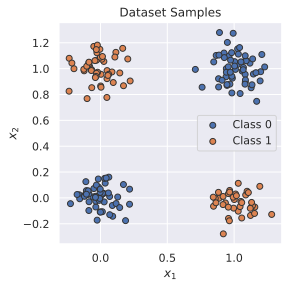

In [61]:
visualise_samples(dataset.data, dataset.label)
plt.show()


#### The DataLoader class